In [203]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [204]:
!curl -fsS http://udon.stacken.kth.se/\~ninjin/comp0090_assignment_1_data.tar.gz -o /tmp/data.tar.gz
!tar -x -z -f /tmp/data.tar.gz
!rm -f /tmp/data.tar.gz

In [205]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0))
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0))
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz").transpose((2, 1, 0))
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

In [206]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)
print(testxs.shape)
print(testys.shape)

(12000, 28, 28)
(12000,)
(1000, 28, 28)
(1000,)
(1000, 28, 28)
(1000,)


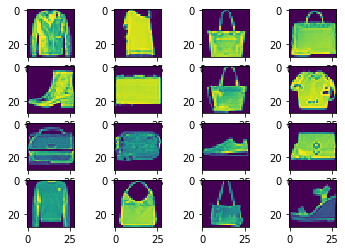

In [207]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))])

## 2.1 Analytical Gradients

$$                   \mathcal{L} = \frac{1}{n}\displaystyle\sum_{i=1}^{n}{\frac{(y_i -\hat{y_i})^2}{2}}
$$

Given a logistic activation function, let: $$\hat{y} = \sigma(\displaystyle\sum_{i=1}^n w_i x_i + b) = \sigma(\mathbf{x} \cdot \mathbf{w} + b)$$ where $\mathbf{x} \in \mathbb{R}^n, \mathbf{w} \in \mathbb{R}^n, b \in \mathbb{R}$

For a single-layer MLP with k parallel neurons, the weight vectors can be represented collectively as the following weight matrix $\mathbf{W}$:

$$\mathbf{W} = [\mathbf{w_1},...,\mathbf{w_k}] \in \mathbb{R}^{k \times n}$$

and the bias scalars as the following vector $\mathbf{b}$:

$$\mathbf{b} = [b_1,...,b_k] \in \mathbb{R}^k$$

The gradient for $\mathcal{L}$ with respect to the weight matrix is given by:

$$\nabla_{\mathbf{W}}\mathcal{L} = \bigg[\frac{\partial \mathcal{L}}{\partial \mathbf{w_1}},...,\frac{\partial \mathcal{L}}{\partial \mathbf{w_k}} \bigg]^T$$

where the partial derivatives of a scalar wrt a vector are given by:

$$\frac{\partial \mathcal{L}}{\partial \mathbf{w_j}} = \bigg[\frac{\partial \mathcal{L}}{\partial w_1},...,\frac{\partial \mathcal{L}}{\partial w_n}\bigg]^T$$

The gradient for $\mathcal{L}$ with respect to the bias:

$$\nabla_{\mathbf{b}}\mathcal{L} = \bigg[\frac{\partial \mathcal{L}}{\partial b_1},...,\frac{\partial \mathcal{L}}{\partial b_k} \bigg]^T$$

To obtain the partial derivatives, let 

$$z_i = \sum_{i=1}^{n} x_{ij} w_{ij} + b_i$$

where i = 1,...,n and j = 1,...,k

so that

$$\hat{y}_i = \sigma(z_i)$$

Thus, by the chain rule we obtain:

$$\frac{\partial \mathcal{L}}{\partial w_{ij}} = \frac{\partial \mathcal{L}}{\partial \hat{y}_i} \times \frac{\partial \hat{y}_i}{\partial z_i} \times \frac{\partial z_i}{\partial w_{ij}} \qquad (1)$$

$$\frac{\partial \mathcal{L}}{\partial b_i} = \frac{\partial \mathcal{L}}{\partial \hat{y}_i} \times \frac{\partial \hat{y}_i}{\partial z_i} \times \frac{\partial z_i}{\partial b_i} \qquad (2)$$

$$\frac{\partial \mathcal{L}}{\partial \hat{y}_i} = \frac{\partial}{\partial \hat{y}_i} \frac{1}{n} \displaystyle\sum^{n}_{i=1} \frac{(y_i - \hat{y}_i)^2}{2} = 
\frac{1}{n} \displaystyle\sum^{n}_{i=1} \frac{\partial}{\partial \hat{y}_i} \frac{(y_i - \hat{y}_i)^2}{2} = \\
= \frac{1}{n} \displaystyle\sum^{n}_{i=1} \frac{\partial}{\partial \hat{y}_i} \frac{2(y_i - \hat{y}_i)(-1)}{2} =
\frac{1}{n} \displaystyle\sum^{n}_{i=1} \hat{y}_i - y_i \qquad (3)$$

$$\frac{\partial \hat{y}_i}{\partial z_i} = \hat{y}_i(1 - \hat{y}_i) \qquad (4)$$ 

where Eq (4) is given by the derivative of the logistic function: $\sigma(x)' = \sigma(x)(1-\sigma(x)$

$$\frac{\partial z_i}{\partial w_{ij}} = \frac{\partial}{\partial w_{ij}} \sum_{j=1}^{n} x_{ij} w_{ij} + b_i = \sum_{j=1}^{n} \frac{\partial}{\partial w_{ij}} (x_{ij} w_{ij} + b_i) = x_{ij} \qquad (5)$$

$$\frac{\partial z_i}{\partial b_i} = \frac{\partial}{\partial b_i} \sum_{j=1}^{n} x_{ij} w_{ij} + b_i = \sum_{j=1}^{n} \frac{\partial}{\partial b_i} (x_{ij} w_{ij} + b_i) = 1\qquad (6)$$

Substituting the relevant partial derivatives into Eq (1) and (2):
    
$$\frac{\partial \mathcal{L}}{\partial w_{ij}} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} (\hat{y}_i - y_i) \hat{y}_i (1 - \hat{y}_i) x_{ij}$$

$$\frac{\partial \mathcal{L}}{\partial b_i} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} (\hat{y}_i - y_i) \hat{y}_i (1 - \hat{y}_i)$$

## 2.2 Verifying Gradients Correctness

## 2.3 


In [208]:
# reshape data to make it easier to work with
trainxs = trainxs.reshape(-1, 784)
devxs = devxs.reshape(-1, 784)
testxs = testxs.reshape(-1, 784)

In [209]:
# function to create weight and sum parameters for the algorithm
def initialise_parameters(xs):
    w = np.zeros(xs.shape[1])
    b = 0
    return w, b

In [210]:
def logistic_func(x):
    return 1/(1 + np.exp(-x))

def logistic_der(x):
    return _logistic_func(x) * (1 - _logistic_func(x))

def f(x, w, b):
    return logistic_func(np.dot(w, x) + b)

def p(x, w, b):
    if f(x, w, b) >= 0.5:
        return 1
    return 0

In [211]:
#Measure Accuracy

def accuracy(xs, ys, w, b):
    correct = 0
    for i in range(xs.shape[0]):
        if p(xs[i], w, b) == ys[i]:
            correct += 1
    return correct/len(xs)*100  

In [212]:
#Loss Function

def loss_func(n, trainys, y_predict):
    sum = 0
    for i in range(n):
        sum += (trainys[i] - y_predict[i]) ** 2
    return 1/2*n*sum

In [213]:
def logistic_regression(trainxs, trainys, devxs, devys):
    w, b = initialise_parameters(trainxs)
    
    accuracy_training = []
    accuracy_validation = []
    
    # store old accuracy and consecutive epochs count to detect convergence
    acc_old = accuracy(trainxs, trainys, w, b)
    row_epoch = 0
    
    # store predicted y's and loss for each epoch
    y_predict = []
    loss_training = []
    
    # store number of epochs to have a nice graph
    epoch = 0
    learning_rate = 0.01
    
    while True:
        print('Epoch', epoch)
        trainxs, trainys = shuffle(trainxs, trainys)
        grad_w, grad_b = initialise_parameters(trainxs)
        y_predict = []

        for i in range(trainxs.shape[0]):
            y_hat = f(trainxs[i], w, b)
            y_predict.append(y_hat)
            grad_b += (y_hat - trainys[i]) * (1 - y_hat) * y_hat
            grad_w += trainxs[i] * (y_hat - trainys[i]) * (1 - y_hat) * y_hat
            


        w -= learning_rate * grad_w / trainxs.shape[0]
        b -= grad_b * learning_rate / trainxs.shape[0]

        accuracy_train = accuracy(trainxs, trainys, w, b)
        accuracy_training.append(accuracy_train)
        print('Training set accuracy:', accuracy(trainxs, trainys, w, b))
        accuracy_dev = accuracy(devxs, devys, w, b)
        accuracy_validation.append(accuracy_dev)
        print('Validation set accuracy:', accuracy_dev)
        
        loss_train = loss_func(trainxs.shape[0], trainys, y_predict)
        loss_training.append(loss_train)
        
        # check if converged
        if np.abs(accuracy_train - acc_old) < 0.1:
            row_epoch += 1
            if row_epoch == 5:
                break
        else:
            row_epoch = 0
            
        acc_old = accuracy_train
        epoch += 1
    
    return epoch, accuracy_training, accuracy_validation, loss_training

In [214]:
epoch, accuracy_training, accuracy_validation, loss_training = logistic_regression(trainxs, trainys, devxs, devys)

Epoch 0
Training set accuracy: 55.95833333333333
Validation set accuracy: 56.89999999999999
Epoch 1
Training set accuracy: 56.625
Validation set accuracy: 57.9
Epoch 2
Training set accuracy: 57.34166666666667
Validation set accuracy: 58.5
Epoch 3
Training set accuracy: 58.166666666666664
Validation set accuracy: 59.0
Epoch 4
Training set accuracy: 58.90833333333333
Validation set accuracy: 59.699999999999996
Epoch 5
Training set accuracy: 59.875
Validation set accuracy: 60.5
Epoch 6
Training set accuracy: 60.741666666666674
Validation set accuracy: 61.3
Epoch 7
Training set accuracy: 61.55833333333334
Validation set accuracy: 62.0
Epoch 8
Training set accuracy: 62.3
Validation set accuracy: 62.8
Epoch 9
Training set accuracy: 63.016666666666666
Validation set accuracy: 63.5
Epoch 10
Training set accuracy: 63.675000000000004
Validation set accuracy: 64.2
Epoch 11
Training set accuracy: 64.25
Validation set accuracy: 64.9
Epoch 12
Training set accuracy: 64.95
Validation set accuracy: 66.

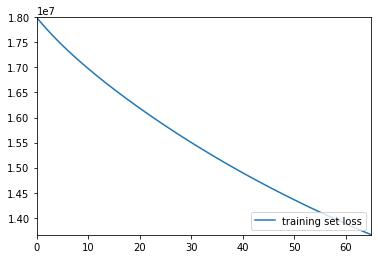

In [215]:
plt.axis([0, epoch, min(loss_training), max(loss_training) + 0.1])
plt.plot(loss_training, label='training set loss')
plt.legend(loc='lower right')

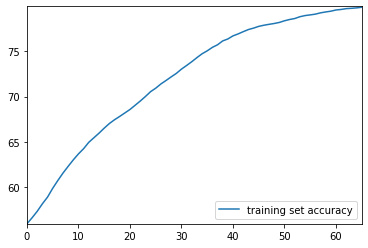

In [216]:
plt.axis([0, epoch, min(accuracy_training), max(accuracy_training) + 0.1])
plt.plot(accuracy_training, label='training set accuracy')
plt.legend(loc='lower right')

In [217]:
ind = accuracy_validation.index(max(accuracy_validation))
print("Best epoch =", ind)
print("Accuracy on training set =", accuracy_training[ind])
print("Accuracy on validation set =", accuracy_validation[ind])

Best epoch = 65
Accuracy on training set = 79.85833333333333
Accuracy on validation set = 80.60000000000001
